<a href="https://colab.research.google.com/github/msaddamhussain07/MachineLearning/blob/main/comparing_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compairing classifiers for building classification models

In this we will be building different classifiers and will also compaire there performance.

## 1. Generating a sample data set

### 1.1 Import library

In [1]:
from sklearn.datasets import make_classification

### 1.2 Generating the data set

In [2]:
X, Y = make_classification(
    n_samples=1000,
    n_classes=2,
    n_features=5,
    n_redundant=0,
    random_state=1
)

### 1.3 Examine th data dimension

In [3]:
X.shape

(1000, 5)

In [4]:
Y.shape

(1000,)

## 2 Splitting the data into training set and test set (80/20)

### 2.1 Import library

In [5]:
from sklearn.model_selection import train_test_split

### 2.2 Splitting the data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

### 2.3 Examine the training and testing data set

In [7]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [8]:
X_test.shape, Y_test.shape

((200, 5), (200,))

## 3. Building the classification models

## 3.1 Importing modules

In [10]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### 3.2 Defining learning classifiers

In [11]:
names = ["Nearest_Neighbors",
         "Linear_SVM",
         "Polynomial_SVM",
         "RBF_SVM",
         "Gaussian_Process",
         "Gradient_Boosting",
         "Decission_Tree",
         "Extra_Tree",
         "Random_Forest",
         "Neural_net",
         "AdaBoost",
         "Naive_Bayes",
         "QDA",
         "SGD"]

In [16]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=10, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")
]

### 3.3 Build models and apply models on test data & record accuracy score

In [17]:
scores = []
for name, clf in zip(names, classifiers):
  clf.fit(X_train, Y_train)
  score = clf.score(X_test, Y_test)
  scores.append(score)

In [18]:
scores

[0.87,
 0.865,
 0.83,
 0.835,
 0.895,
 0.84,
 0.885,
 0.88,
 0.89,
 0.91,
 0.865,
 0.88,
 0.85,
 0.8]

## 4. Analysis of all the model performance

### 4.1 Import library

In [19]:
import pandas as pd
import seaborn as sns

### 4.2 Create data frame of model performance

In [20]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.870
1,Linear_SVM,0.865
2,Polynomial_SVM,0.830
3,RBF_SVM,0.835
4,Gaussian_Process,0.895
5,Gradient_Boosting,0.840
6,Decission_Tree,0.885
7,Extra_Tree,0.880
8,Random_Forest,0.890
9,Neural_net,0.910


### 4.3 Adding colors to the data frame

In [21]:
cm = sns.light_palette("blue", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.870000
1,Linear_SVM,0.865000
2,Polynomial_SVM,0.830000
3,RBF_SVM,0.835000
4,Gaussian_Process,0.895000
5,Gradient_Boosting,0.840000
6,Decission_Tree,0.885000
7,Extra_Tree,0.880000
8,Random_Forest,0.890000
9,Neural_net,0.910000


### 4.4 Bar plot of model performance

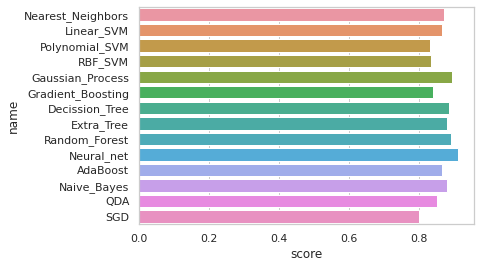

In [22]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)